<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/Linear_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression in TensorFlow

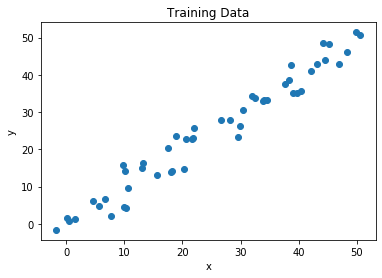

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

np.random.seed(101) 
tf.set_random_seed(101)                         # Generating random linear data. 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50)                      # There will be 50 data points ranging from 0 to 50. 
x += np.random.uniform(-4, 4, 50)               # Adding noise to the random linear data. 
y += np.random.uniform(-4, 4, 50)  
n = len(x)                                      # Number of data points.
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show()                                       # Plot of training data. 

In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01                                 # Learning rate.
training_epochs = 5000                               # Number of epochs.
epcs = np.array([])                                  # Arrays for plots.
csts = np.array([])
y_pred = tf.add(tf.multiply(X, W), b)                # Hypothesis. 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)  # Mean squared error cost function.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)     # Gradient descent optimizer.  
init = tf.global_variables_initializer()                                        # Global variables initializer.
      
with tf.Session() as sess:                            # Starting the TensorFlow session.
    sess.run(init)                                    # Initializing the variables. 
    for epoch in range(training_epochs):              # Iterating through all the epochs 
        for (_x, _y) in zip(x, y):                    # Feeding each data point into the optimizer using feed dictionary. 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        if (epoch + 1) % 1000 == 0:                   # Displaying the result after every 1000 epochs. 
            c = sess.run(cost, feed_dict = {X : x, Y : y})                      # Calculating the cost every epoch. 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
            epcs = np.append(epcs, epoch+1) 
            csts = np.append(csts, c)                                           # Points for plots.
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1000 : cost = 5.3110337 W = 1.0199214 b = 0.02561676
Epoch 2000 : cost = 5.275055 W = 1.0228614 b = -0.11813593
Epoch 3000 : cost = 5.271694 W = 1.0231683 b = -0.1331458
Epoch 4000 : cost = 5.2713456 W = 1.0232005 b = -0.13471808
Epoch 5000 : cost = 5.271311 W = 1.0232038 b = -0.13488193


Training cost = 5.271311 Weight = 1.0232038 bias = -0.13488193 



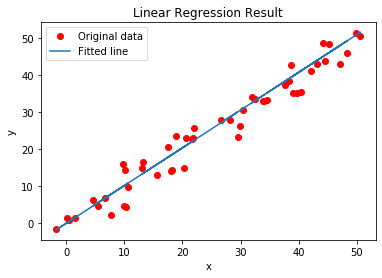

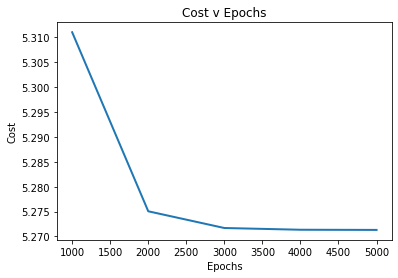

In [0]:
predictions = weight * x + bias                        # Calculating the predictions. 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')
plt.plot(x, y, 'ro', label ='Original data')           # Plotting the results.   
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.xlabel('x') 
plt.ylabel('y')
plt.legend() 
plt.show() 
plt.plot(epcs, csts, lw=2)
plt.title('Cost v Epochs')
plt.xlabel('Epochs') 
plt.ylabel('Cost')
plt.show() 

